In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import darts
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from sklearn.preprocessing import MinMaxScaler


import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset,get_m3,arange_m3


/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)

datasets = ['M3Year']
data = get_m3(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
models = ['RNN']
h_multi = 2
reps = 1
inlen = 12
outlen = 6

243


## Baseline

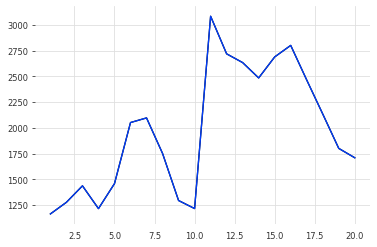

In [8]:
train_dataset,trainset,trainset_ts,testset = arange_m3(data,shift_time=False,use_scaler =False)
index =97

plt.plot(data.iloc[index,6:].dropna())


example = np.concatenate([trainset[index].ravel(),testset[index]])

plt.plot(np.arange(len(example))+1,example)
plt.show()

2022-08-11 21:15:48 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-08-11 21:15:48 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-08-11 21:15:48 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-08-11 21:15:48 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-08-11 21:15:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-08-11 21:15:48 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-08-11 21:15:48 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 350   


Epoch 9: 100%|██████████| 127/127 [00:00<00:00, 212.77it/s, loss=0.000867, train_loss=0.00114] 


2022-08-11 21:15:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 127it [00:00, ?it/s]


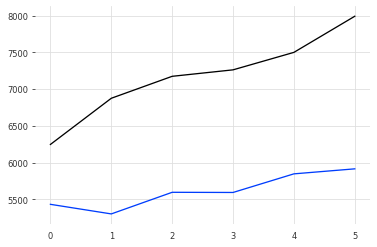

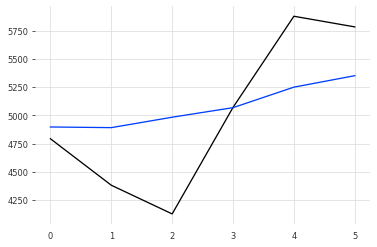

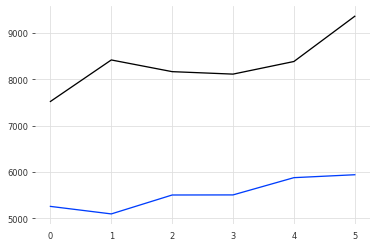

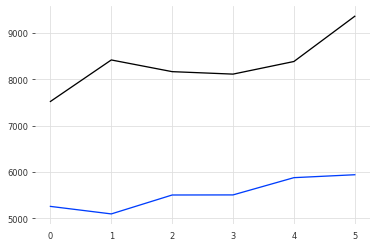

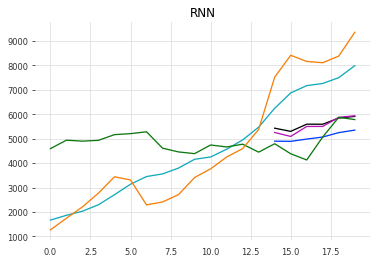

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,M3Year,RNN,24.91376,1681.035,19.26,0.0,0.0,0.0,0,[],[]


In [9]:
aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations




baseline_result  = da_forecasting.runM3(models = models,
                                        dataset_names = datasets,
                                        h_multi = h_multi,
                                        reps=reps,
                                        aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
                                        plot = True,
                                        seed = seed,
                                       use_scaler = True)      
baseline_result

2022-08-11 20:22:36 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-08-11 20:22:36 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-08-11 20:22:36 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-08-11 20:22:36 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-08-11 20:22:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-08-11 20:22:36 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-08-11 20:22:36 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 99: 100%|██████████| 127/127 [00:04<00:00, 31.24it/s, loss=1.82e+05, train_loss=1.76e+5]


2022-08-11 20:29:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 127it [00:00, ?it/s]


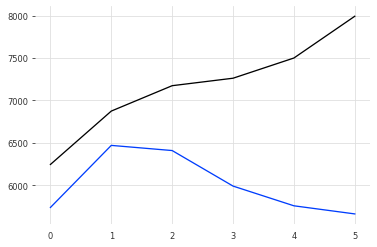

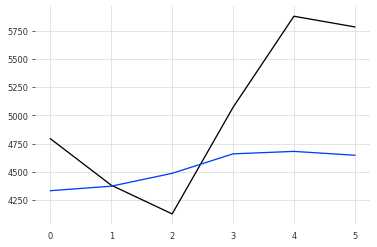

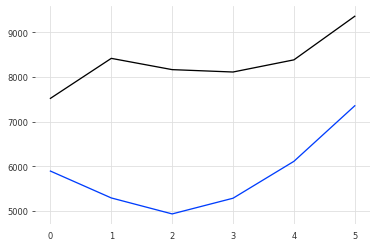

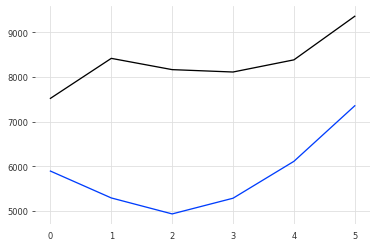

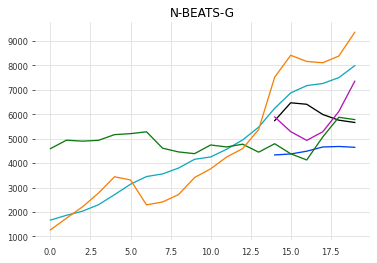

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,M3Year,N-BEATS-G,23.6583,2147.174,18.222,0.0,0.0,0.0,0,[],[]


In [5]:
aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations




baseline_result  = da_forecasting.runM3(models = models,
                                        dataset_names = datasets,
                                        h_multi = h_multi,
                                        reps=reps,
                                        aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
                                        plot = True,
                                        seed = seed,
                                       use_scaler = False)      
baseline_result


In [6]:
dd

NameError: name 'dd' is not defined

In [ ]:

aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations




baseline_result  = da_forecasting.runM3(models = models,
                                        dataset_names = datasets,
                                        h_multi = h_multi,
                                        reps=reps,
                                        aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
                                        plot = True,
                                        seed = seed)      
baseline_result

In [ ]:

aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations




baseline_result  = da_forecasting.runM3(models = models,
                                        dataset_names = datasets,
                                        h_multi = h_multi,
                                        reps=reps,
                                        aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
                                        plot = True,
                                        seed = seed)      
baseline_result


In [ ]:
dd

# Identity

In [ ]:
da.plot_augmentation(data,seasonality,"Identity")

In [ ]:

aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Identity').astype(int)]
iden_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
iden_results

# Jittering

In [ ]:
da.plot_augmentation(data,seasonality,"Jittering")

In [ ]:

aug_n = 1
aug_m = [1]
aug_p = [(np.array(list(da.ranges.keys()))=='Jittering').astype(int)]
jitter_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed) 
jitter_results

# Flip

In [ ]:
da.plot_augmentation(data,seasonality,"Flip")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int)]
flip_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
flip_results

# Trend Scale

In [ ]:
da.plot_augmentation(data,seasonality,"Trend Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
trend_scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
trend_scale_results

# Permutation

In [ ]:
da.plot_augmentation(data,seasonality,"Permutation")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='Permutation').astype(int)]
perm_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
perm_results


# Scale

In [ ]:
da.plot_augmentation(data,seasonality,"Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int)]
scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
scale_results

# Reverse

In [ ]:
da.plot_augmentation(data,seasonality,"Reverse")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Reverse').astype(int)]
reverse_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
reverse_results

# Smoothing - Temporal Smoothness (Least Squares)

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth LS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth LS').astype(int)]
ls_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ls_results

# Smoothing ETS

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth ETS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
ets_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ets_results

# MBB

In [ ]:
da.plot_augmentation(data,seasonality,"MBB")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='MBB').astype(int)]
mbb_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mbb_results

# Gaussian time warping

In [ ]:

da.plot_augmentation(data,seasonality,"Gaussian TW")

In [ ]:
aug_n = 1
aug_m = [2]
aug_p = [(np.array(list(da.ranges.keys()))=='Gaussian TW').astype(int)]
gtw_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
gtw_results

# Dynamic Time Stretching

In [ ]:
da.plot_augmentation(data,seasonality,"DTS")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
dts_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
dts_results

# Window Warping

In [ ]:
da.plot_augmentation(data,seasonality,"Window Warping")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
ww_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ww_results

# Save results

In [ ]:
results = []
results.append(dts_results)
results.append(gtw_results)
results.append(mbb_results)
results.append(ets_results)
results.append(ls_results)
results.append(reverse_results)
results.append(scale_results)
results.append(perm_results)
results.append(trend_scale_results)
results.append(flip_results)
results.append(jitter_results)
results.append(iden_results)
results.append(baseline_result)
results.append(ww_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [ ]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_aug_results1.xlsx")

In [ ]:
seed